### <center><font color=navy> Tutorial #9 Computer- and robot-assisted surgery</font></center>
## <center><font color=navy> ML Basics I</font></center>
<center>&copy; Sebastian Bodenstedt, National Center for Tumor Diseases (NCT) Dresden<br>
    <a href="https://www.nct-dresden.de/"><img src="https://www.nct-dresden.de/++theme++nct/images/logo-nct-en.svg"></a> </center>

## <center><font color=navy>Preperation</font></center>

For this tutorial, we will utilize the OpenCV, Matplotlib and NumPy:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

We will also download some data:

In [2]:
import urllib.request
from os.path import basename, exists

def download(url): #download and extract Zip archive
    file_path = basename(url)
    if not exists(file_path): # does zip file already exist?
        urllib.request.urlretrieve(url, file_path) # if not, download it

In [3]:
download("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
download("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names")

We now list the extracted files:

Import dataset

In [4]:
data = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

Show the readme

In [5]:
f = open("pima-indians-diabetes.names", "r")
lines = f.readlines()
for l in lines:
    print(l[:-1])
f.close()

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [6]:
print(data.shape)
for i in range(10):
    print(data[i])

(768, 9)
[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
[ 1.    85.    66.    29.     0.    26.6    0.351 31.     0.   ]
[  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]
[ 1.    89.    66.    23.    94.    28.1    0.167 21.     0.   ]
[  0.    137.     40.     35.    168.     43.1     2.288  33.      1.   ]
[  5.    116.     74.      0.      0.     25.6     0.201  30.      0.   ]
[ 3.    78.    50.    32.    88.    31.     0.248 26.     1.   ]
[ 10.    115.      0.      0.      0.     35.3     0.134  29.      0.   ]
[2.00e+00 1.97e+02 7.00e+01 4.50e+01 5.43e+02 3.05e+01 1.58e-01 5.30e+01
 1.00e+00]
[  8.    125.     96.      0.      0.      0.      0.232  54.      1.   ]


Let's print 2D projections of the data for visualization purposes

(768,)


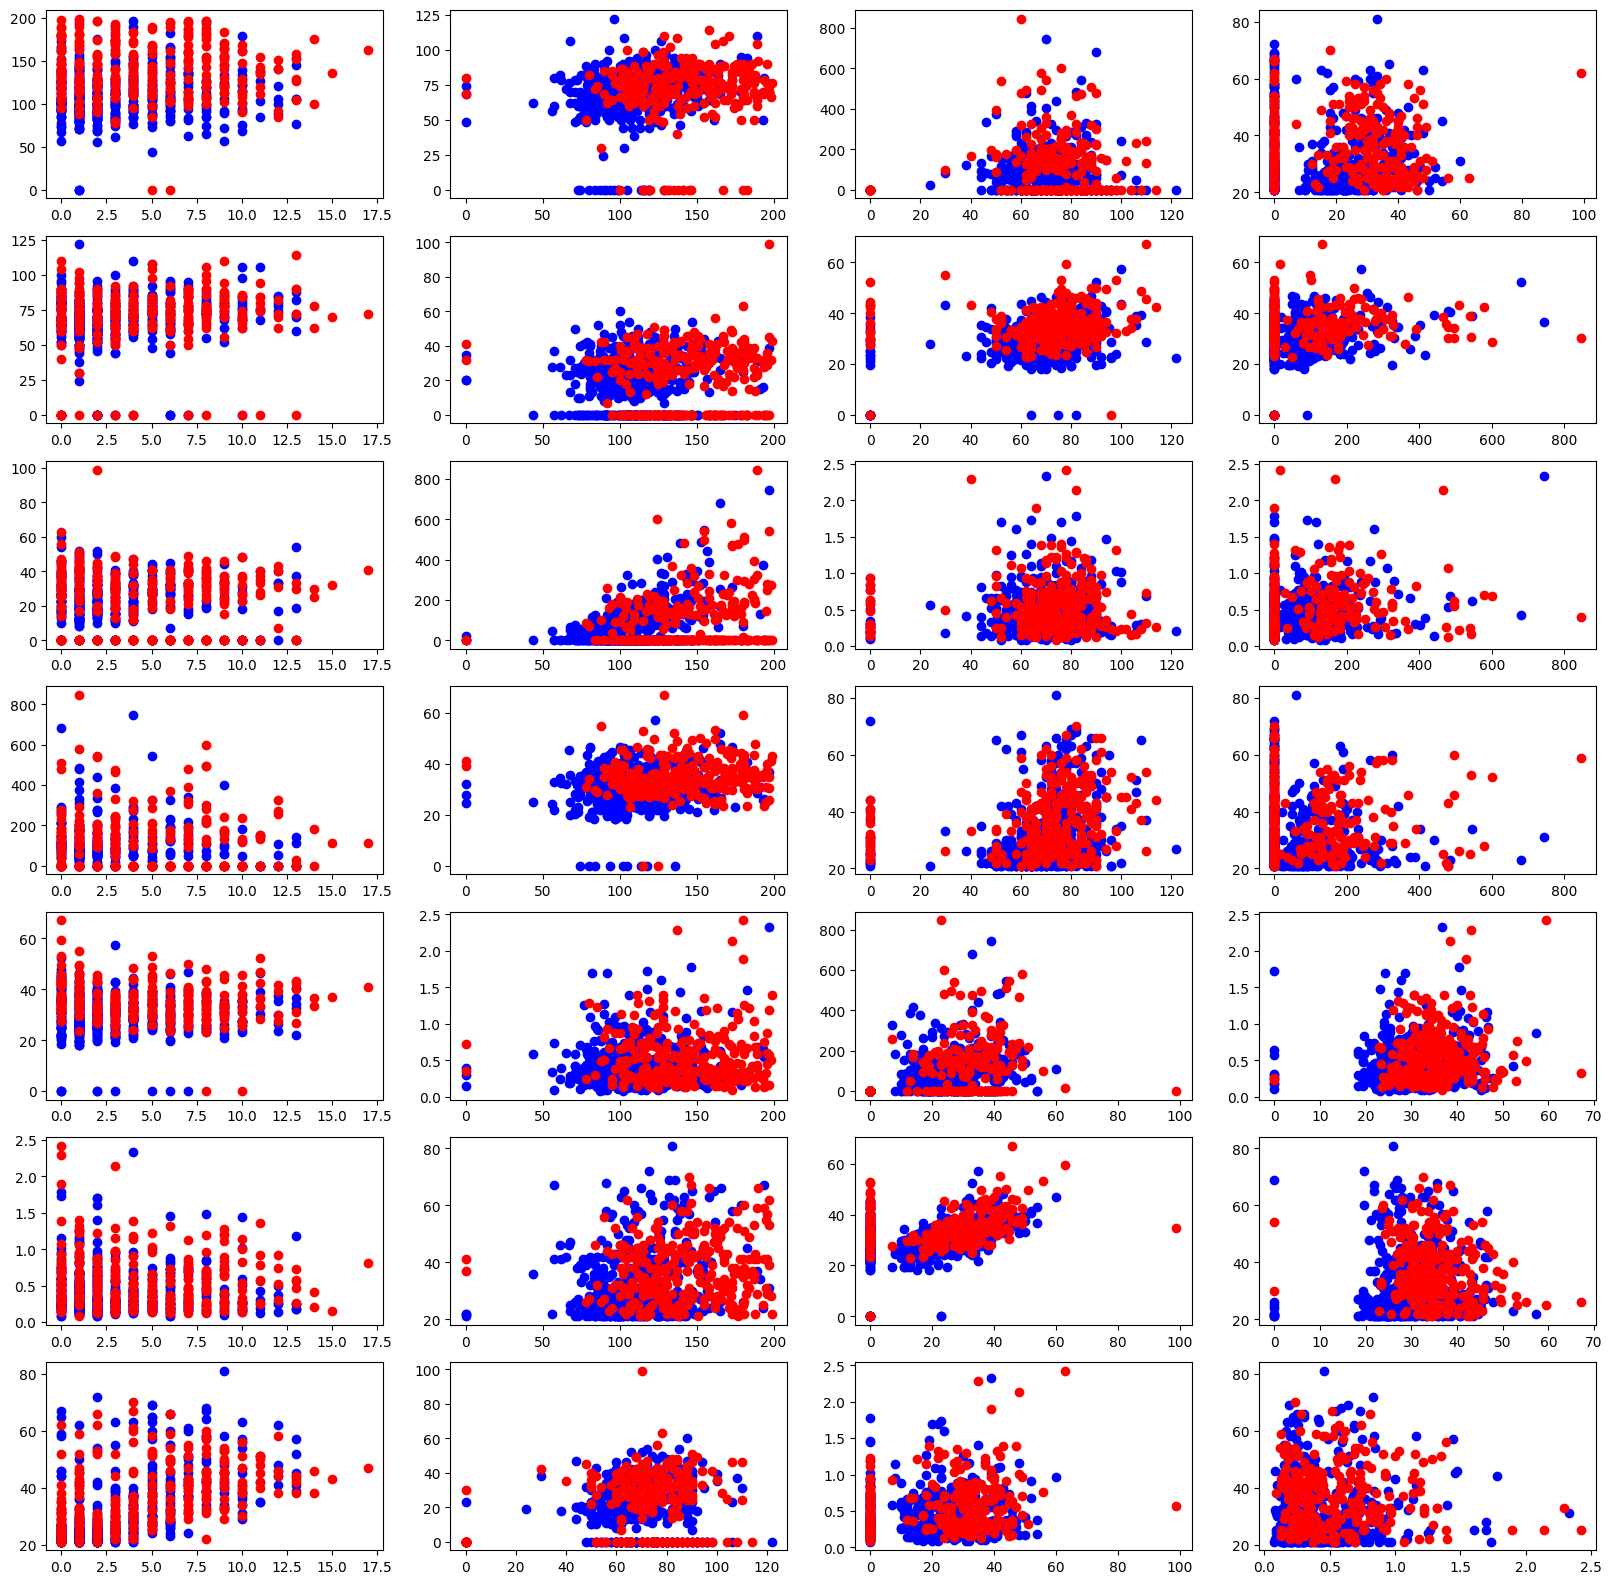

In [10]:
figure, axis = plt.subplots(7, 4, figsize=(20, 20)) # subplots let you visualize multiple outputs simultanously

pos = data[:, 8] == 1
neg = data[:, 8] == 0

print(pos.shape)

count = 0
for i in range(8):
    for j in range(i+1, 8):
        axis_x = count % 7
        axis_y = count // 7
        
        count += 1

        axis[axis_x, axis_y].scatter(data[:, i][neg], data[:, j][neg], c="b")
        axis[axis_x, axis_y].scatter(data[:, i][pos], data[:, j][pos], c="r")


Let's divide the dataset into training and testing batches

In [11]:
i = data[:, :8]
j = data[:, 8]

x_train = i[:700]
y_train = j[:700]

x_test = i[700:]
y_test = j[700:]

print(x_train.shape, x_test.shape)

(700, 8) (68, 8)


We train a K-Nearest Neighbors Classifier

In [17]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = KNeighborsClassifier(n_neighbors=5)

In [13]:
clf.fit(x_train, y_train)

KNeighborsClassifier()

We test it on the training and testing data

In [14]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

print((pred_train == y_train).astype(np.uint8))

print("Accuracy train %.3f" % (np.sum(pred_train == y_train)/pred_train.shape[0]))
print("Accuracy test %.3f" % (np.sum(pred_test == y_test)/pred_test.shape[0]))

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 

In [15]:
def recall_precision(gt, pred):
    tp = np.sum(np.logical_and(gt == 1, pred == 1))
    fp = np.sum(np.logical_and(gt == 0, pred == 1))
    fn = np.sum(np.logical_and(gt == 1, pred == 0))
    
    recall = tp/(tp+fp)
    precision = tp/(tp+fn)
    
    return recall, precision
    

In [16]:
print("Accuracy train %.3f" % (np.sum(pred_train == y_train)/pred_train.shape[0]))
print(recall_precision(y_train, pred_train))
print("Accuracy test %.3f" % (np.sum(pred_test == y_test)/pred_test.shape[0]))
print(recall_precision(y_test, pred_test))

Accuracy train 0.803
(np.float64(0.7417840375586855), np.float64(0.6556016597510373))
Accuracy test 0.735
(np.float64(0.68), np.float64(0.6296296296296297))


TODO: Try the other classifiers and PCA!